In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import simpy
from datetime import datetime, timedelta
from matplotlib.animation import FuncAnimation
import random
from utilities import *
from port_trafic_simulation.Generator import *

### Importing the Weather data


In [3]:
Weather = pd.read_excel('Weather_Time_Series.xlsx')
Weather.head()

,Date,Wave direction [deg],Wave height [m],Wave period [s],Wind direction [deg],Wind speed [m/s]
0,2015-01-01 0:00,352,0.22,9.25,11,8.34
1,2015-01-01 3:00,8,0.20,9.32,4,7.51
2,2015-01-01 6:00,337,0.19,10.19,8,6.54
3,2015-01-01 9:00,292,0.19,11.05,8,6.68
4,2015-01-01 12:00,292,0.20,10.86,4,6.31


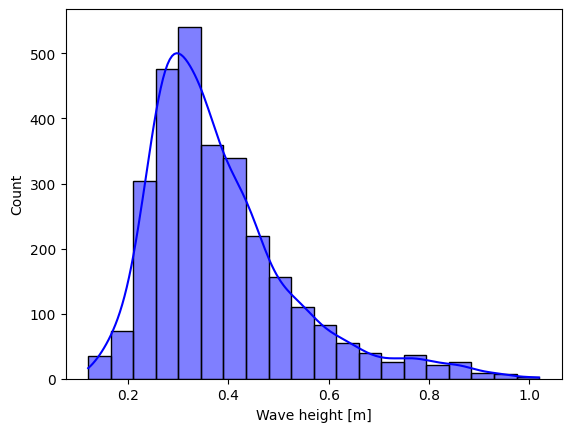

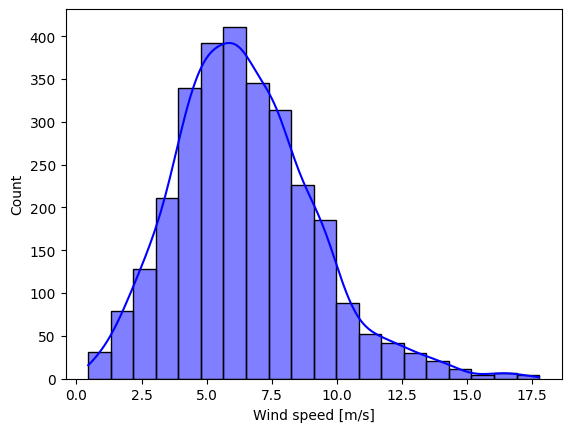

In [11]:
sns.histplot(data=Weather, x='Wave height [m]', color='blue', bins=20, kde=True)
plt.show()

sns.histplot(data=Weather, x='Wind speed [m/s]', color='blue', bins=20, kde=True)
plt.show()

In [12]:
Weather.describe()

,Wave direction [deg],Wave height [m],Wave period [s],Wind direction [deg],Wind speed [m/s]
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,305.767808,0.382380,11.089812,129.297945,6.485103
std,96.090315,0.143847,2.820716,139.591086,2.670264
min,1.000000,0.120000,4.590000,0.000000,0.450000
25%,322.000000,0.280000,8.850000,16.000000,4.650000
50%,338.000000,0.350000,10.900000,48.000000,6.250000
75%,352.000000,0.440000,13.160000,307.000000,8.045000
max,359.000000,1.020000,20.730000,360.000000,17.780000


## Example 1: Single-Product Export Scenario

**Key Parameters:**
- **Product Volume:** 1,500,000 m³ (one product to export)
- **Number of Berths:** 1
- **Storage Capacity:** 50,000
- **Ship Composition:** Flexible (various ship types)
- **Average Preservice Time:** 3 minutes
- **Average Postservice Time:** 3 minutes
- **Simulation Duration:** 1 year
- **Start Date:** January 1, 2025


In [4]:
simulation_time = 24*366 # Simulate for n days
start_time = datetime(2025, 1, 1, 0, 0)  # Simulation start time
simulation_envirement = simpy.Environment()
channel = simpy.PriorityResource(simulation_envirement, capacity=1)  # Define the channel resource


#product_type
num_berths = 1 # 2 berths for each product type
num_storage = 1
mean_pre_service_time = 3
mean_post_service_time = 3

# Create the berths
berths = [simpy.Resource(simulation_envirement, capacity=1) for _ in range(num_berths)]
berth_maintenance = Berth(simulation_envirement)

# Create the storage
storage = Storage(simulation_envirement, temporary_storage=100_000)

# Create the statistics tracker
stats = Stats()


#product 1
fleet_composition1 = {
    'A': {'Capacity': 15000, 'Composition': 0, 'Loading Rate (T/h)': 1200, 'LOA (m)': 144},
    'B': {'Capacity': 25000, 'Composition': 0.1, 'Loading Rate (T/h)': 1500, 'LOA (m)': 180},
    'C': {'Capacity': 35000, 'Composition': 0.5, 'Loading Rate (T/h)': 1800, 'LOA (m)': 196},
    'D': {'Capacity': 50000, 'Composition': 0.4, 'Loading Rate (T/h)': 2000, 'LOA (m)': 255},
    'E': {'Capacity': 80000, 'Composition': 0, 'Loading Rate (T/h)': 2200, 'LOA (m)': 300}
}

# Production data as a dictionary with fleet compositions
production_data = {
    'Liquide1': {'Composition': 1, 'Production per Year': 1_500_000, 'Fleet Composition': fleet_composition1}
}

# Create the ship generator
generator = GenerateShips(simulation_envirement, berths,berth_maintenance, channel, Weather,start_time, mean_pre_service_time, 
                          mean_post_service_time, stats ,production_data, storage  , Night_navigation = False)


# Start the ship generation process
simulation_envirement.process(generator.generate_ships())

# Run the simulation
simulation_envirement.run(until=simulation_time)


## Example 2: Two-Product Export Scenario

**Key Parameters:**
- **Product Volume:** 1,500,000 m³ (Two different product to export)
- **Number of Berths:** 2 (one for each)
- **Storage Capacity:** 50,000 (each)
- **Ship Composition:** Flexible (various ship types)
- **Average Preservice Time:** 3 minutes
- **Average Postservice Time:** 3 minutes
- **Simulation Duration:** 1 year
- **Start Date:** January 1, 2025


In [14]:
simulation_time = 24*366 # Simulate for n days
start_time = datetime(2025, 1, 1, 0, 0)  # Simulation start time
simulation_envirement = simpy.Environment()
channel = simpy.PriorityResource(simulation_envirement, capacity=1)  # Define the channel resource


#product_type
num_berths = 2 # 2 berths for each product type
num_storage = 1
mean_pre_service_time = 3
mean_post_service_time = 3

# Create the berths
berths = [simpy.Resource(simulation_envirement, capacity=1) for _ in range(num_berths)]
berth_maintenance = Berth(simulation_envirement)

# Create the storage
storage_1 = Storage(simulation_envirement, temporary_storage=50_000)
storage_2 = Storage(simulation_envirement, temporary_storage=50_000)

# Create the statistics tracker
stats = Stats()


#product 1
fleet_composition1 = {
    'A': {'Capacity': 15000, 'Composition': 0, 'Loading Rate (T/h)': 1200, 'LOA (m)': 144},
    'B': {'Capacity': 25000, 'Composition': 0.1, 'Loading Rate (T/h)': 1500, 'LOA (m)': 180},
    'C': {'Capacity': 35000, 'Composition': 0.5, 'Loading Rate (T/h)': 1800, 'LOA (m)': 196},
    'D': {'Capacity': 50000, 'Composition': 0.4, 'Loading Rate (T/h)': 2000, 'LOA (m)': 255},
    'E': {'Capacity': 80000, 'Composition': 0, 'Loading Rate (T/h)': 2200, 'LOA (m)': 300}
}

#product 2
fleet_composition2 = {
    'A': {'Capacity': 15000, 'Composition': 0.5, 'Loading Rate (T/h)': 1200, 'LOA (m)': 144},
    'B': {'Capacity': 25000, 'Composition': 0, 'Loading Rate (T/h)': 1500, 'LOA (m)': 180},
    'C': {'Capacity': 35000, 'Composition': 0, 'Loading Rate (T/h)': 1800, 'LOA (m)': 196},
    'D': {'Capacity': 50000, 'Composition': 0, 'Loading Rate (T/h)': 2000, 'LOA (m)': 255},
    'E': {'Capacity': 80000, 'Composition': 0.5, 'Loading Rate (T/h)': 2200, 'LOA (m)': 300}
}

# Production data as a dictionary with fleet compositions
production_data = {
    'Liquide1': {'Composition': 1, 'Production per Year': 1_500_000, 'Fleet Composition': fleet_composition1}
}

production_data2 = {
    'Liquide2': {'Composition': 1, 'Production per Year': 1_500_000, 'Fleet Composition': fleet_composition2}
}

# Create the ship generator

generator = GenerateShips(simulation_envirement, berths,berth_maintenance, channel, Weather,start_time, mean_pre_service_time, 
                          mean_post_service_time, stats ,production_data, storage_1  , Night_navigation = False)

generator2 = GenerateShips(simulation_envirement, berths,berth_maintenance, channel, Weather,start_time, mean_pre_service_time,
                            mean_post_service_time, stats ,production_data2, storage_2  , Night_navigation = False)

# Start the ship generation process
simulation_envirement.process(generator.generate_ships())
simulation_envirement.process(generator2.generate_ships())

# Run the simulation
simulation_envirement.run(until=simulation_time)


## Statistics

#### Average

In [7]:
AVG_Stats = stats.get_average_kpis()
AVG_Stats = pd.DataFrame(AVG_Stats.items(), columns=['KPI', 'Value'])
AVG_Stats

,KPI,Value
0,avg_berth_waiting_time,0:16
1,avg_mc_waiting_time,1:24
2,avg_waiting_time,1:41
3,avg_storage_waiting_time,5:23
4,avg_Port Operation,35:10
5,avg_total_time,44:30


#### Maximume

In [8]:
MAX_Stats = stats.get_max_kpis()
MAX_Stats = pd.DataFrame(MAX_Stats.items(), columns=['KPI', 'Value'])
MAX_Stats

,KPI,Value
0,max_berth_waiting_time,19:09
1,max_mc_waiting_time,64:30
2,max_waiting_time,64:30
3,max_Port Operation,65:42
4,max_total_time,126:36


#### By Ship Type

In [9]:
ships= stats.get_ship_type_kpis()
ships_kpis_bytype = pd.DataFrame(ships)
ships_kpis_bytype


,E,D,A,C,B
avg_berth_waiting_time,1:07,0:00,0:00,0:00,0:00
avg_mc_waiting_time,4:40,0:00,1:12,0:00,0:00
avg_waiting_time,5:48,0:00,1:12,0:00,0:00
avg_Port Operation,53:58,36:27,20:41,29:29,24:37
avg_total_time,67:32,45:15,29:49,35:35,30:33
max_berth_waiting_time,19:09,0:00,0:00,0:00,0:00
max_mc_waiting_time,64:30,0:00,4:30,0:00,0:00
max_waiting_time,64:30,0:00,4:30,0:00,0:00
max_Port Operation,65:42,41:40,32:51,39:28,31:03
max_total_time,126:36,59:00,45:33,43:46,38:41


#### All Simulation Data

In [10]:
data = stats.ship_data
data = pd.DataFrame(data)
data.head()

,Arrival,vessel_id,Vessel,Product_name,Berth_claimed,Finished_loading,Berth_released,WT meteorological constraints,WT Ships in queue,WT Berth occupied,WT Night,Port Operation,berth occupied,TAT,Expected TAT,Departure_Time,cargo_loaded
0,2025-01-10 03:28:00,VesselE749,E,Liquide2,2025-01-13 00:58:00,2025-01-15 05:39:00,2025-01-15 10:04:00,64:30,64:30,0:00,5:00,54:06,Liquide2 1,126:36,48:06,2025-01-15 10:05:00,80.000000
1,2025-01-18 15:38:00,VesselD319,D,Liquide1,2025-01-18 15:38:00,2025-01-20 04:14:00,2025-01-20 08:30:00,0:00,0:00,0:00,0:00,36:02,Liquide1 1,40:52,28:22,2025-01-20 08:30:00,53.333333
2,2025-01-20 12:58:00,VesselA129,A,Liquide2,2025-01-20 12:58:00,2025-01-21 04:48:00,2025-01-21 06:42:00,0:00,0:00,0:00,0:00,12:53,Liquide2 1,17:44,12:53,2025-01-21 06:43:00,15.000000
3,2025-01-24 11:57:00,VesselE427,E,Liquide2,2025-01-24 11:57:00,2025-01-27 00:27:00,2025-01-27 05:38:00,0:00,0:00,0:00,0:00,61:00,Liquide2 1,65:41,49:00,2025-01-27 05:39:00,80.000000
4,2025-01-28 08:15:00,VesselA366,A,Liquide2,2025-01-28 12:45:00,2025-01-29 06:25:00,2025-01-29 11:10:00,4:30,4:30,0:00,0:00,17:44,Liquide2 0,26:55,17:44,2025-01-29 11:11:00,15.000000


#### Tracking the loading activity in the port

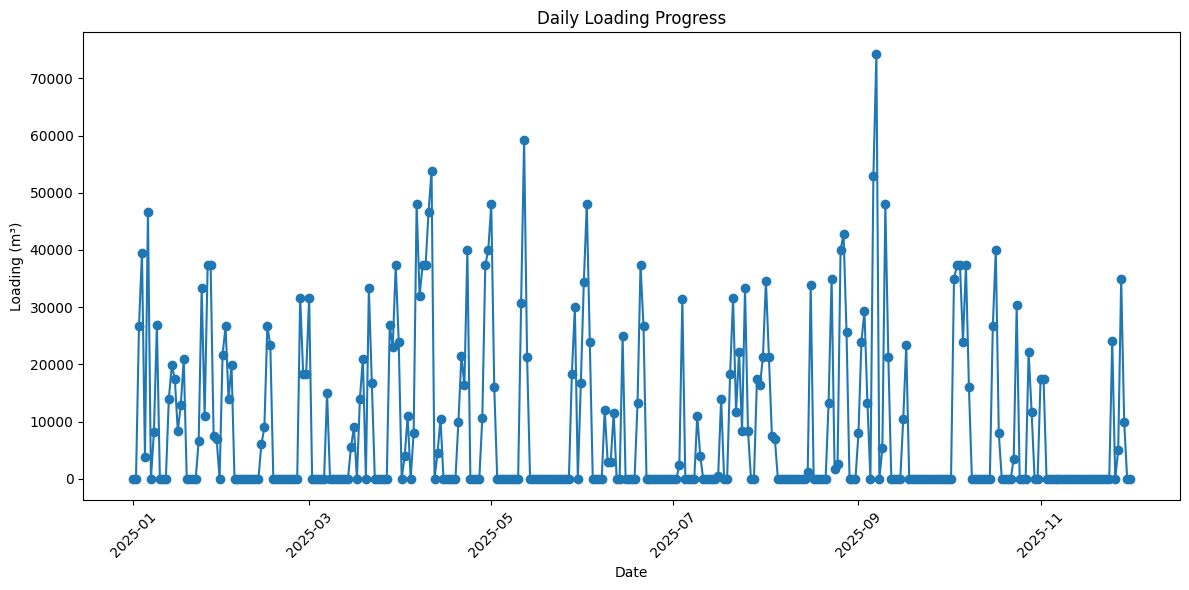

In [15]:
tracked_loading = stats.get_tracker()
tracked_loading = pd.DataFrame(tracked_loading)
start_datetime = datetime(2025, 1, 1, 0, 0)
tracked_loading['datetime'] = start_datetime + pd.to_timedelta(tracked_loading['time'], unit='h')

# Set 'datetime' as the index
tracked_loading.set_index('datetime', inplace=True)

# Resample the loading data by day and sum the loading for each day
daily_loading = tracked_loading['loading'].resample('D').sum()

# Create a date range for the entire year
date_range = pd.date_range(start='2025-01-01', end='2025-12-01', freq='D')

# Reindex the daily_loading Series to include all days, filling missing values with 0
daily_loading = daily_loading.reindex(date_range, fill_value=0)

# Reset index to turn the datetime index into a column
daily_loading = daily_loading.reset_index()

# Rename the columns for clarity
daily_loading.columns = ['datetime', 'loading']

# Plot the daily loading
plt.figure(figsize=(12, 6))
plt.plot(daily_loading['datetime'], daily_loading['loading'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Loading (m³)')
plt.title('Daily Loading Progress')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

#### Tracking the Storage levels (By Ship appearances)

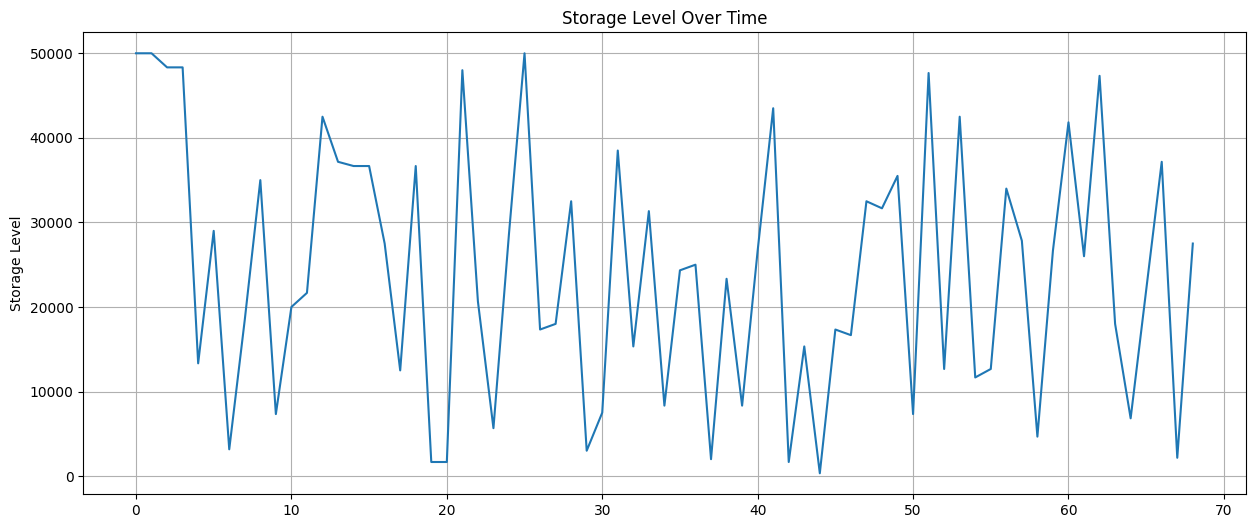

In [16]:
storage_levels = stats.get_storage()
scaled_levels = [(level-100_000)/1000 for level in storage_levels]


plt.figure(figsize=(15, 6))
plt.plot(storage_levels[:100])

plt.ylabel("Storage Level")
plt.title("Storage Level Over Time")
plt.grid(True)